In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import GradientBoostingClassifier

movie_df = pd.read_excel("종합.xlsx")
y = movie_df["흥행등급"].values
X = movie_df[["긍정비율","개봉 이틀째 관객수","2일차 스크린수","SF"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
len(X_test)

45

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=3,learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.932
테스트 세트 정확도: 0.822


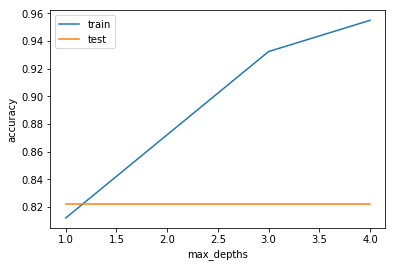

In [5]:
max_depths = range(1, 5)

training_accuracy = []
test_accuracy = []
for max_depth in max_depths:
    # 모델 생성
    gbrt = GradientBoostingClassifier(random_state=0,max_depth=max_depth,learning_rate=0.01)
    gbrt.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(gbrt.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(gbrt.score(X_test, y_test))
    
plt.plot(max_depths, training_accuracy, label="train")
plt.plot(max_depths, test_accuracy, label="test")
plt.ylabel("accuracy")
plt.xlabel("max_depths")
plt.legend()
plt.show()

In [6]:
learning_rates = [0.001,0.005,0.01,0.05,0.1]

training_accuracy = []
test_accuracy = []
for learning_rate in learning_rates:
    # 모델 생성
    gbrt = GradientBoostingClassifier(random_state=0,max_depth=3,learning_rate=learning_rate)
    gbrt.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(gbrt.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(gbrt.score(X_test, y_test))
    
plt.plot(learning_rates, training_accuracy, label="train")
plt.plot(learning_rates, test_accuracy, label="test")
plt.ylabel("accuracy")
plt.xlabel("max_depths")
plt.legend()
plt.show()

TypeError: __init__() got an unexpected keyword argument 'alpha'

In [12]:
kx = movie_df[2:3].values

In [13]:
gbrt.predict(kx)

array([3], dtype=int64)

In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate' : [0.001,0.01,0.1,1,10],
    'max_depth' : [1,2,3,4,5]
}

gbrt = GradientBoostingClassifier(random_state=0)
gbrt_grid = GridSearchCV(estimator=gbrt,param_grid = param_grid,cv=10)
gbrt_grid.fit(X_train, y_train)
print(gbrt_grid.best_params_)

{'learning_rate': 0.01, 'max_depth': 1}


C:\Users\CPB06GameN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [63]:
print(gbrt_grid.best_estimator_)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [60]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1,learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))


훈련 세트 정확도: 0.812
테스트 세트 정확도: 0.822


In [56]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=None, iid='warn', refit=True, cv='warn', verbose=0, pre_dispatch='2*n_jobs', error_score='raise-deprecating', return_train_score='warn')
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator 